In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Italy/Veneto/Culex/IT_veneto_culex_2010_2023.csv')
#=====================================================================
data = data[data.trap_type != 'Gravid Trap']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['x', 'y', 'dt_placement',
           'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/Italy_veneto_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/Italy_veneto_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'NN mosq regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Italy/Veneto/Culex/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'mosquito_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, dropna=True)

In [7]:
model = FeedforwardNeuralNetModel(num_features=len(data.iloc[0,:])-2, num_class=1,
                                  hidden_layers = [264,128,128,64,32], model_type=model_type, learning_rate = 0.001,
                                  epochs = 100, batch_size = 128, embedding_data=embedded_data,
                                  dropout=0.2, transformation_list=transformation_list,
                                  early_stop = None, l1_weight=0, l2_weight=0, weights=False)

Epoch 001: | Train Loss: 71682.40111 | Val Loss: 175731.69844 | Train Acc: 152.565| Val Acc: 180.842
Epoch 002: | Train Loss: 70889.13272 | Val Loss: 173829.90234 | Train Acc: 151.532| Val Acc: 179.038
Epoch 003: | Train Loss: 70036.47742 | Val Loss: 172861.93203 | Train Acc: 150.570| Val Acc: 178.417
Epoch 004: | Train Loss: 69221.61452 | Val Loss: 171759.34609 | Train Acc: 149.618| Val Acc: 177.689
Epoch 005: | Train Loss: 68379.85690 | Val Loss: 170839.54453 | Train Acc: 148.623| Val Acc: 176.985
Epoch 006: | Train Loss: 67446.86119 | Val Loss: 169158.82031 | Train Acc: 147.466| Val Acc: 175.474
Epoch 007: | Train Loss: 66416.36004 | Val Loss: 168047.59531 | Train Acc: 146.324| Val Acc: 174.356
Epoch 008: | Train Loss: 65367.20970 | Val Loss: 166176.46484 | Train Acc: 144.911| Val Acc: 172.746
Epoch 009: | Train Loss: 64138.91149 | Val Loss: 164492.76172 | Train Acc: 143.440| Val Acc: 171.513
Epoch 010: | Train Loss: 62831.05974 | Val Loss: 163616.29375 | Train Acc: 142.072| Val Acc

Epoch 084: | Train Loss: 8629.66654 | Val Loss: 84918.28496 | Train Acc: 60.538| Val Acc: 117.008
Epoch 085: | Train Loss: 8482.13518 | Val Loss: 84859.40762 | Train Acc: 59.540| Val Acc: 115.695
Epoch 086: | Train Loss: 8264.90181 | Val Loss: 82775.59883 | Train Acc: 59.270| Val Acc: 114.603
Epoch 087: | Train Loss: 8396.42978 | Val Loss: 83551.86230 | Train Acc: 58.797| Val Acc: 115.534
Epoch 088: | Train Loss: 8226.81626 | Val Loss: 83837.56699 | Train Acc: 59.391| Val Acc: 116.915
Epoch 089: | Train Loss: 8210.49056 | Val Loss: 83904.74023 | Train Acc: 58.813| Val Acc: 116.299
Epoch 090: | Train Loss: 7995.70000 | Val Loss: 82578.12129 | Train Acc: 57.737| Val Acc: 114.967
Epoch 091: | Train Loss: 8317.34879 | Val Loss: 83667.76777 | Train Acc: 58.296| Val Acc: 115.129
Epoch 092: | Train Loss: 8401.18130 | Val Loss: 83396.82266 | Train Acc: 59.445| Val Acc: 115.098
Epoch 093: | Train Loss: 8055.12165 | Val Loss: 83811.41113 | Train Acc: 58.255| Val Acc: 116.225
Epoch 094: | Train L

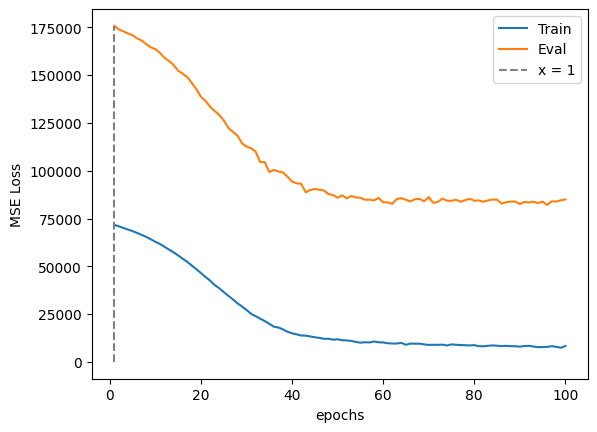

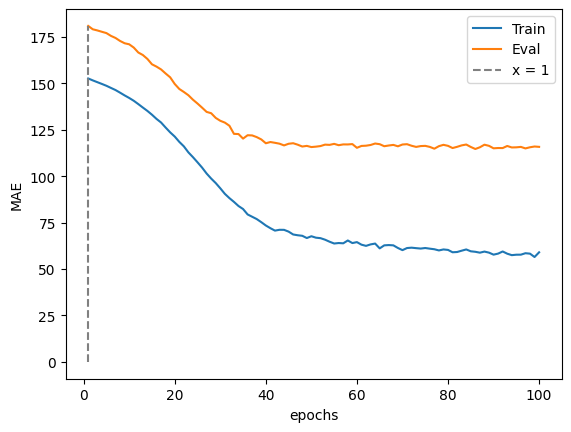

MAE on train set:  41.2805159799769
min prediction: 3
max prediction: 955

MAE on test set:  115.8498023715415
Error <= 30: 49.09 %
min prediction: 4
max prediction: 851


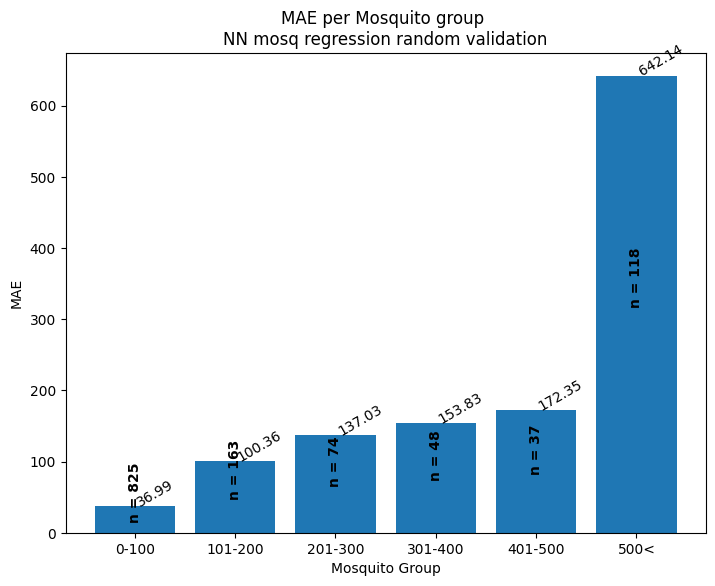

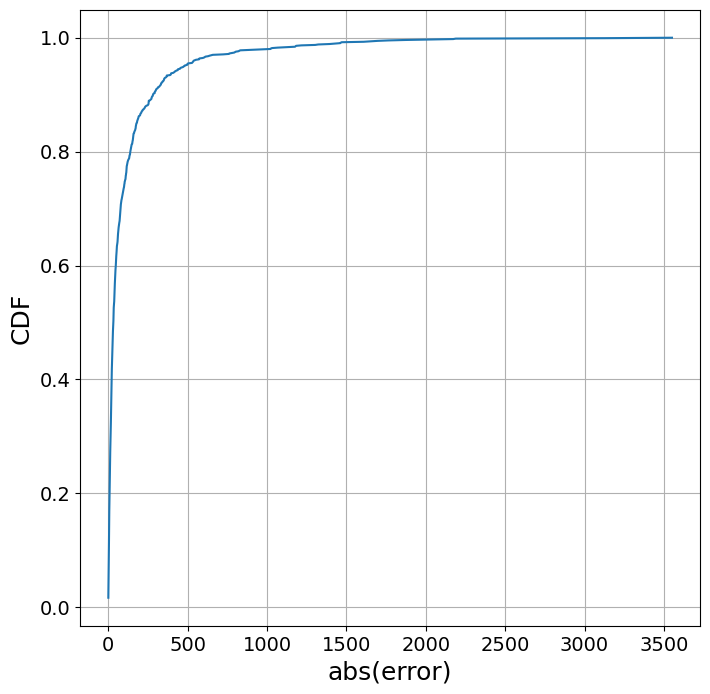

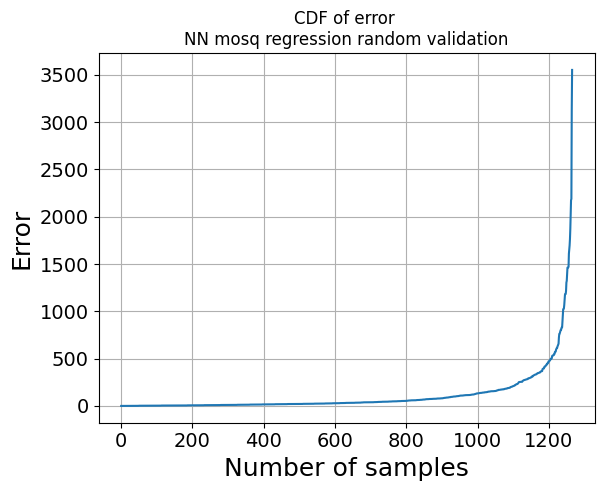

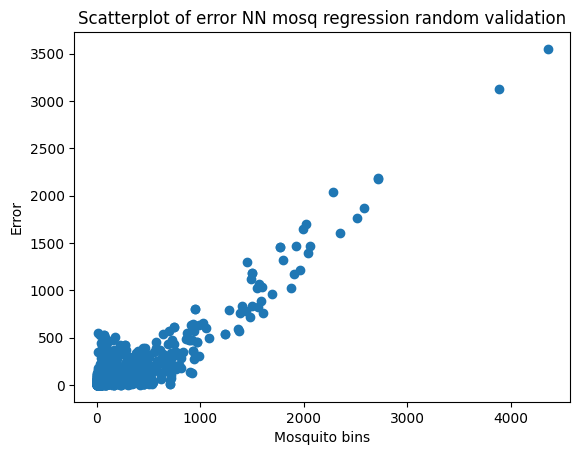

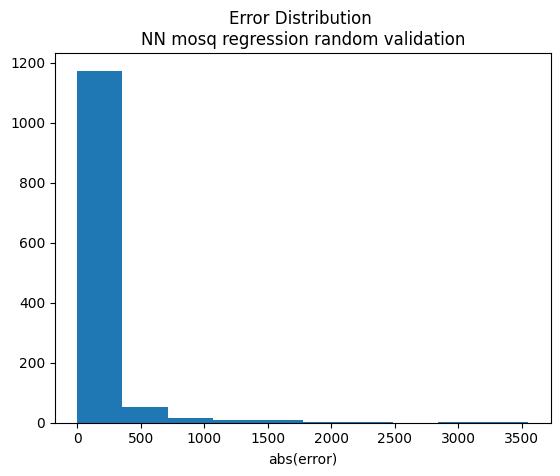

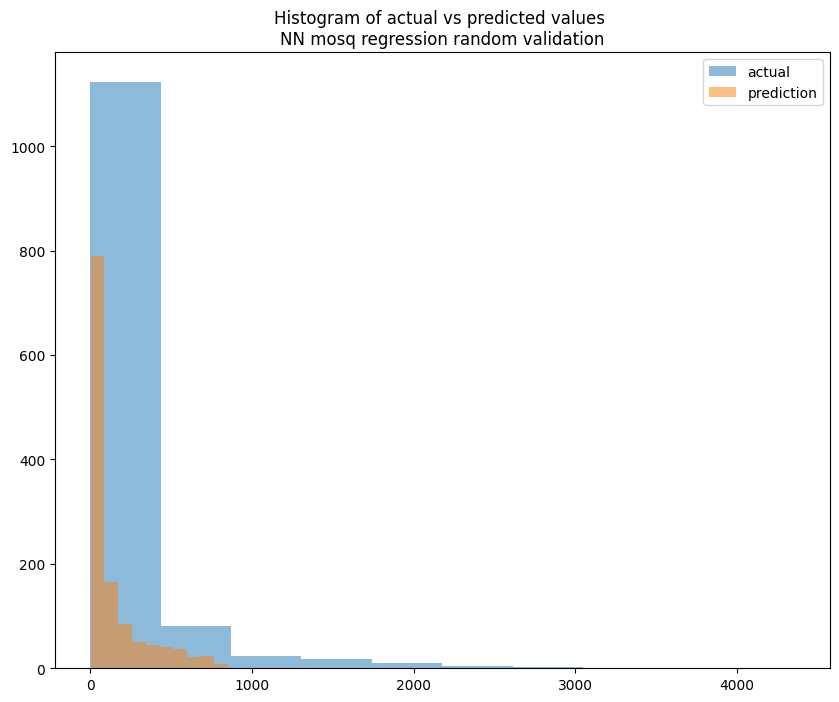

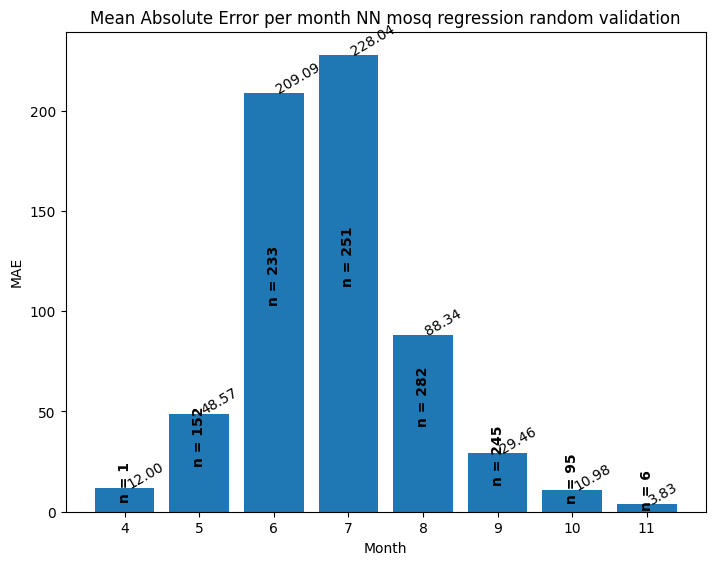

In [8]:
test_model_random_split(data, model, filepath = path, date_col = date_col, case=case_title, export=exp)

Epoch 001: | Train Loss: 72403.23099 | Val Loss: 154062.74453 | Train Acc: 152.559| Val Acc: 175.408
Epoch 002: | Train Loss: 71491.43984 | Val Loss: 152475.96719 | Train Acc: 151.413| Val Acc: 173.979
Epoch 003: | Train Loss: 70584.11215 | Val Loss: 151614.58359 | Train Acc: 150.411| Val Acc: 173.425
Epoch 004: | Train Loss: 69684.51285 | Val Loss: 150579.82578 | Train Acc: 149.349| Val Acc: 172.350
Epoch 005: | Train Loss: 68581.43273 | Val Loss: 149681.12578 | Train Acc: 148.131| Val Acc: 171.676
Epoch 006: | Train Loss: 67518.06389 | Val Loss: 148295.08594 | Train Acc: 146.834| Val Acc: 169.969
Epoch 007: | Train Loss: 66372.93984 | Val Loss: 147035.57422 | Train Acc: 145.427| Val Acc: 168.818
Epoch 008: | Train Loss: 65079.66493 | Val Loss: 145449.98125 | Train Acc: 143.935| Val Acc: 167.289
Epoch 009: | Train Loss: 63650.48468 | Val Loss: 144211.07812 | Train Acc: 142.282| Val Acc: 165.944
Epoch 010: | Train Loss: 62165.26684 | Val Loss: 142054.39688 | Train Acc: 140.499| Val Acc

Epoch 084: | Train Loss: 8246.44215 | Val Loss: 77790.88398 | Train Acc: 58.424| Val Acc: 113.093
Epoch 085: | Train Loss: 8266.53111 | Val Loss: 77907.13555 | Train Acc: 58.842| Val Acc: 114.717
Epoch 086: | Train Loss: 8443.24549 | Val Loss: 77846.56055 | Train Acc: 59.224| Val Acc: 114.239
Epoch 087: | Train Loss: 8250.23686 | Val Loss: 77060.04219 | Train Acc: 58.804| Val Acc: 115.214
Epoch 088: | Train Loss: 8070.09868 | Val Loss: 79484.48867 | Train Acc: 58.231| Val Acc: 115.601
Epoch 089: | Train Loss: 8097.96753 | Val Loss: 78187.34219 | Train Acc: 58.269| Val Acc: 113.860
Epoch 090: | Train Loss: 8263.60947 | Val Loss: 77712.11367 | Train Acc: 58.912| Val Acc: 113.798
Epoch 091: | Train Loss: 8263.22479 | Val Loss: 78468.74297 | Train Acc: 58.621| Val Acc: 113.036
Epoch 092: | Train Loss: 8394.77515 | Val Loss: 76705.28906 | Train Acc: 58.823| Val Acc: 115.217
Epoch 093: | Train Loss: 8388.67885 | Val Loss: 77474.09961 | Train Acc: 59.309| Val Acc: 113.991
Epoch 094: | Train L

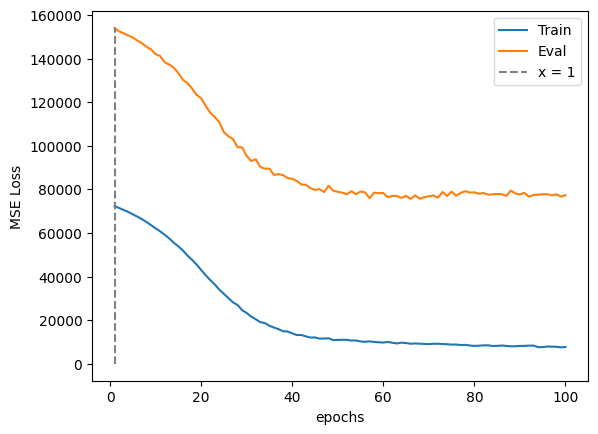

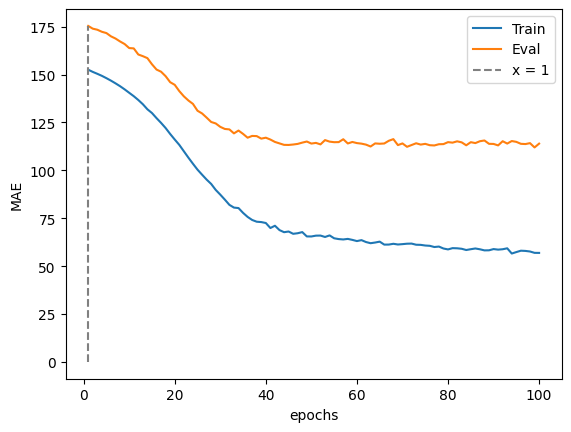

Epoch 001: | Train Loss: 73047.06007 | Val Loss: 134752.44961 | Train Acc: 153.079| Val Acc: 169.381
Epoch 002: | Train Loss: 72142.65304 | Val Loss: 133099.46094 | Train Acc: 151.962| Val Acc: 167.867
Epoch 003: | Train Loss: 71190.71944 | Val Loss: 132142.93945 | Train Acc: 150.959| Val Acc: 167.227
Epoch 004: | Train Loss: 70278.36285 | Val Loss: 131086.72617 | Train Acc: 149.888| Val Acc: 166.272
Epoch 005: | Train Loss: 69233.78299 | Val Loss: 130271.98789 | Train Acc: 148.686| Val Acc: 165.639
Epoch 006: | Train Loss: 68108.39332 | Val Loss: 129114.44023 | Train Acc: 147.360| Val Acc: 164.728
Epoch 007: | Train Loss: 66949.15408 | Val Loss: 127185.94375 | Train Acc: 145.940| Val Acc: 162.743
Epoch 008: | Train Loss: 65673.29271 | Val Loss: 126360.88047 | Train Acc: 144.394| Val Acc: 162.127
Epoch 009: | Train Loss: 64280.37760 | Val Loss: 123980.86602 | Train Acc: 142.813| Val Acc: 159.790
Epoch 010: | Train Loss: 62983.85061 | Val Loss: 122653.44883 | Train Acc: 141.111| Val Acc

Epoch 084: | Train Loss: 8070.62730 | Val Loss: 58778.80605 | Train Acc: 57.958| Val Acc: 106.925
Epoch 085: | Train Loss: 8449.40629 | Val Loss: 60040.28672 | Train Acc: 58.811| Val Acc: 107.148
Epoch 086: | Train Loss: 8193.97020 | Val Loss: 59635.30664 | Train Acc: 58.935| Val Acc: 107.244
Epoch 087: | Train Loss: 7877.81135 | Val Loss: 60822.73906 | Train Acc: 57.515| Val Acc: 108.251
Epoch 088: | Train Loss: 8425.15232 | Val Loss: 60240.87734 | Train Acc: 58.970| Val Acc: 108.388
Epoch 089: | Train Loss: 8016.03478 | Val Loss: 59315.38047 | Train Acc: 58.125| Val Acc: 107.830
Epoch 090: | Train Loss: 7977.78745 | Val Loss: 60087.86738 | Train Acc: 57.911| Val Acc: 107.618
Epoch 091: | Train Loss: 8061.64431 | Val Loss: 61938.39102 | Train Acc: 57.870| Val Acc: 108.638
Epoch 092: | Train Loss: 8256.53611 | Val Loss: 60869.21465 | Train Acc: 58.167| Val Acc: 107.410
Epoch 093: | Train Loss: 7829.50150 | Val Loss: 60773.76719 | Train Acc: 57.222| Val Acc: 106.568
Epoch 094: | Train L

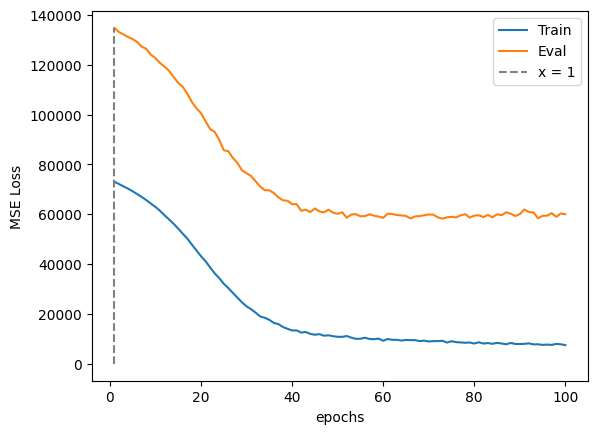

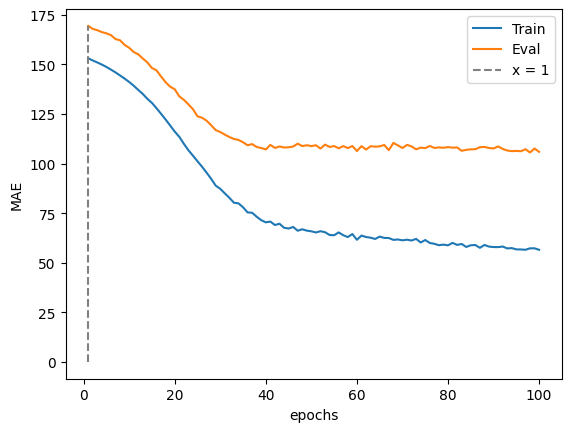

Epoch 001: | Train Loss: 71445.87569 | Val Loss: 180499.74375 | Train Acc: 151.695| Val Acc: 189.849
Epoch 002: | Train Loss: 70580.50000 | Val Loss: 178491.62188 | Train Acc: 150.607| Val Acc: 188.145
Epoch 003: | Train Loss: 69629.46432 | Val Loss: 177467.55469 | Train Acc: 149.630| Val Acc: 187.444
Epoch 004: | Train Loss: 68739.26224 | Val Loss: 176066.93125 | Train Acc: 148.533| Val Acc: 186.188
Epoch 005: | Train Loss: 67764.95295 | Val Loss: 175127.59687 | Train Acc: 147.349| Val Acc: 185.607
Epoch 006: | Train Loss: 66664.73576 | Val Loss: 173062.55938 | Train Acc: 145.992| Val Acc: 183.739
Epoch 007: | Train Loss: 65523.43889 | Val Loss: 172010.25469 | Train Acc: 144.646| Val Acc: 183.207
Epoch 008: | Train Loss: 64313.20738 | Val Loss: 169940.83438 | Train Acc: 143.226| Val Acc: 181.191
Epoch 009: | Train Loss: 62919.66189 | Val Loss: 167524.82812 | Train Acc: 141.498| Val Acc: 178.810
Epoch 010: | Train Loss: 61608.31111 | Val Loss: 165815.15937 | Train Acc: 139.789| Val Acc

Epoch 084: | Train Loss: 8498.63482 | Val Loss: 85081.72422 | Train Acc: 60.006| Val Acc: 122.543
Epoch 085: | Train Loss: 8019.72642 | Val Loss: 86089.22812 | Train Acc: 58.259| Val Acc: 122.975
Epoch 086: | Train Loss: 8142.21359 | Val Loss: 87287.59766 | Train Acc: 57.984| Val Acc: 122.283
Epoch 087: | Train Loss: 8335.83446 | Val Loss: 85305.67109 | Train Acc: 59.617| Val Acc: 123.149
Epoch 088: | Train Loss: 8354.30623 | Val Loss: 86850.78828 | Train Acc: 59.082| Val Acc: 123.261
Epoch 089: | Train Loss: 7950.60405 | Val Loss: 87940.98594 | Train Acc: 58.028| Val Acc: 124.499
Epoch 090: | Train Loss: 8022.45288 | Val Loss: 86599.30625 | Train Acc: 57.668| Val Acc: 122.529
Epoch 091: | Train Loss: 8071.30749 | Val Loss: 87109.74141 | Train Acc: 58.380| Val Acc: 124.127
Epoch 092: | Train Loss: 7828.28787 | Val Loss: 88291.24687 | Train Acc: 57.726| Val Acc: 122.743
Epoch 093: | Train Loss: 8014.65420 | Val Loss: 86418.36719 | Train Acc: 58.406| Val Acc: 124.546
Epoch 094: | Train L

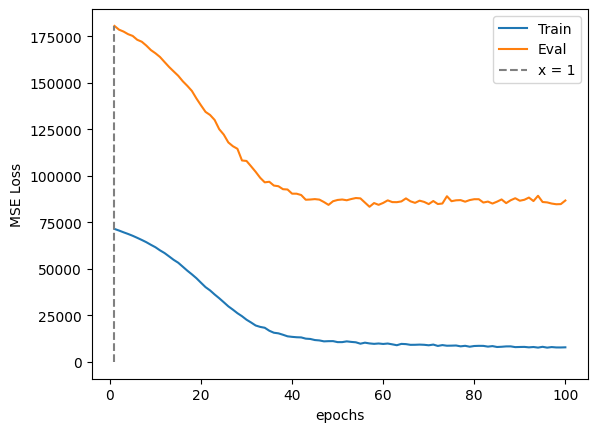

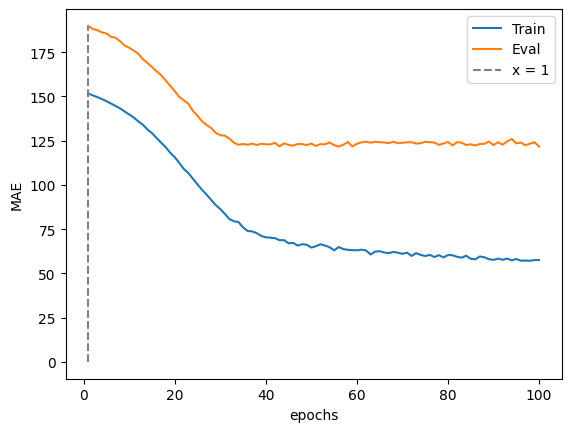

Epoch 001: | Train Loss: 71506.16215 | Val Loss: 148164.96406 | Train Acc: 151.959| Val Acc: 175.696
Epoch 002: | Train Loss: 70606.79722 | Val Loss: 146165.66250 | Train Acc: 150.840| Val Acc: 173.888
Epoch 003: | Train Loss: 69725.84193 | Val Loss: 145125.72344 | Train Acc: 149.877| Val Acc: 173.018
Epoch 004: | Train Loss: 68794.81840 | Val Loss: 144198.67500 | Train Acc: 148.829| Val Acc: 172.277
Epoch 005: | Train Loss: 67823.97552 | Val Loss: 142855.68203 | Train Acc: 147.637| Val Acc: 170.876
Epoch 006: | Train Loss: 66652.83203 | Val Loss: 141875.73984 | Train Acc: 146.345| Val Acc: 170.229
Epoch 007: | Train Loss: 65540.57378 | Val Loss: 139859.62734 | Train Acc: 144.977| Val Acc: 168.158
Epoch 008: | Train Loss: 64284.09670 | Val Loss: 138392.73828 | Train Acc: 143.431| Val Acc: 166.675
Epoch 009: | Train Loss: 62970.48602 | Val Loss: 136373.25625 | Train Acc: 141.717| Val Acc: 164.896
Epoch 010: | Train Loss: 61521.75820 | Val Loss: 134787.03047 | Train Acc: 140.033| Val Acc

Epoch 084: | Train Loss: 8204.07182 | Val Loss: 63956.80898 | Train Acc: 58.663| Val Acc: 116.004
Epoch 085: | Train Loss: 8720.76033 | Val Loss: 64212.52422 | Train Acc: 60.654| Val Acc: 113.691
Epoch 086: | Train Loss: 8439.71695 | Val Loss: 64781.66563 | Train Acc: 59.593| Val Acc: 114.204
Epoch 087: | Train Loss: 7927.57017 | Val Loss: 63657.80742 | Train Acc: 58.260| Val Acc: 115.713
Epoch 088: | Train Loss: 8273.52675 | Val Loss: 64741.28281 | Train Acc: 58.722| Val Acc: 114.059
Epoch 089: | Train Loss: 8238.86807 | Val Loss: 64865.81992 | Train Acc: 59.014| Val Acc: 113.491
Epoch 090: | Train Loss: 8095.94219 | Val Loss: 65439.91875 | Train Acc: 58.283| Val Acc: 114.807
Epoch 091: | Train Loss: 8020.41207 | Val Loss: 63833.65234 | Train Acc: 57.923| Val Acc: 113.609
Epoch 092: | Train Loss: 7942.36177 | Val Loss: 63939.75938 | Train Acc: 57.693| Val Acc: 111.888
Epoch 093: | Train Loss: 7919.73835 | Val Loss: 64348.43008 | Train Acc: 58.228| Val Acc: 112.955
Epoch 094: | Train L

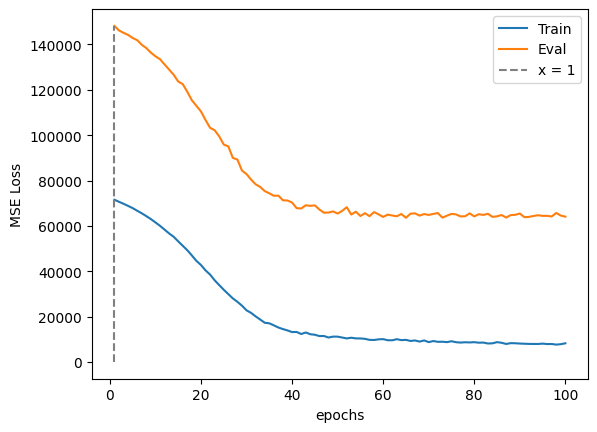

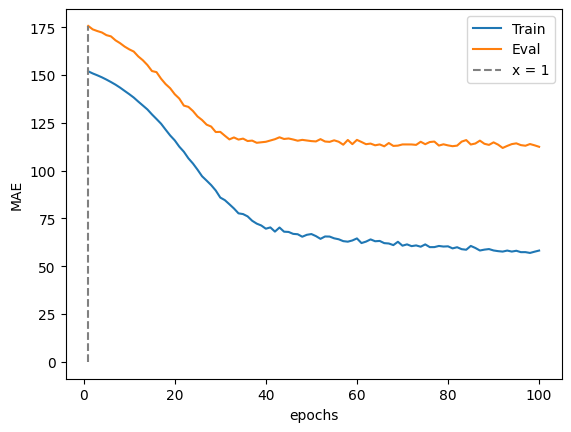

Epoch 001: | Train Loss: 72384.32474 | Val Loss: 205998.02813 | Train Acc: 152.747| Val Acc: 175.640
Epoch 002: | Train Loss: 71463.08950 | Val Loss: 203958.46406 | Train Acc: 151.628| Val Acc: 173.880
Epoch 003: | Train Loss: 70545.13316 | Val Loss: 203013.98594 | Train Acc: 150.623| Val Acc: 173.392
Epoch 004: | Train Loss: 69665.57925 | Val Loss: 201497.61250 | Train Acc: 149.581| Val Acc: 172.179
Epoch 005: | Train Loss: 68615.64818 | Val Loss: 200574.26406 | Train Acc: 148.399| Val Acc: 171.602
Epoch 006: | Train Loss: 67569.42865 | Val Loss: 199174.75781 | Train Acc: 147.083| Val Acc: 170.435
Epoch 007: | Train Loss: 66417.02691 | Val Loss: 197796.06719 | Train Acc: 145.725| Val Acc: 169.308
Epoch 008: | Train Loss: 65086.29618 | Val Loss: 195635.68438 | Train Acc: 144.066| Val Acc: 167.885
Epoch 009: | Train Loss: 63669.05586 | Val Loss: 194107.52656 | Train Acc: 142.560| Val Acc: 166.377
Epoch 010: | Train Loss: 62304.52847 | Val Loss: 191869.30156 | Train Acc: 140.750| Val Acc

Epoch 083: | Train Loss: 8435.23920 | Val Loss: 115774.59609 | Train Acc: 58.953| Val Acc: 110.965
Epoch 084: | Train Loss: 8095.50928 | Val Loss: 114542.66094 | Train Acc: 58.717| Val Acc: 110.125
Epoch 085: | Train Loss: 8354.13824 | Val Loss: 114003.08281 | Train Acc: 59.230| Val Acc: 110.859
Epoch 086: | Train Loss: 7778.34927 | Val Loss: 115201.73125 | Train Acc: 57.352| Val Acc: 112.436
Epoch 087: | Train Loss: 7987.36576 | Val Loss: 114901.20859 | Train Acc: 58.255| Val Acc: 112.135
Epoch 088: | Train Loss: 8287.20266 | Val Loss: 115716.09766 | Train Acc: 58.374| Val Acc: 110.535
Epoch 089: | Train Loss: 8044.65970 | Val Loss: 114156.54609 | Train Acc: 58.495| Val Acc: 110.787
Epoch 090: | Train Loss: 8212.00640 | Val Loss: 116098.34922 | Train Acc: 58.710| Val Acc: 113.211
Epoch 091: | Train Loss: 7970.33867 | Val Loss: 115102.92266 | Train Acc: 57.862| Val Acc: 111.317
Epoch 092: | Train Loss: 8138.59065 | Val Loss: 115033.70859 | Train Acc: 58.107| Val Acc: 111.245
Epoch 093:

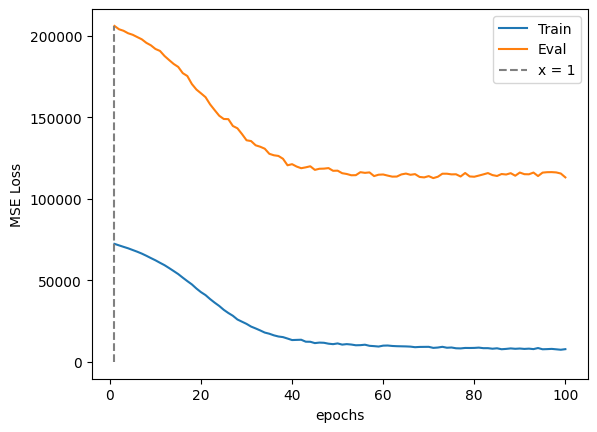

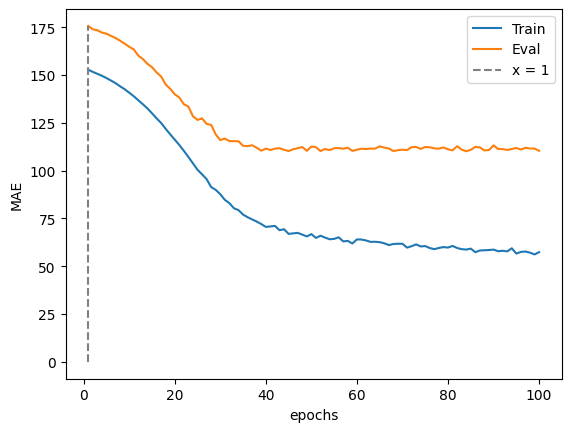

Epoch 001: | Train Loss: 70164.45990 | Val Loss: 202518.41875 | Train Acc: 150.532| Val Acc: 204.478
Epoch 002: | Train Loss: 69247.20807 | Val Loss: 200291.59844 | Train Acc: 149.389| Val Acc: 202.655
Epoch 003: | Train Loss: 68363.90911 | Val Loss: 199125.27344 | Train Acc: 148.414| Val Acc: 201.878
Epoch 004: | Train Loss: 67414.89748 | Val Loss: 197639.34375 | Train Acc: 147.310| Val Acc: 200.725
Epoch 005: | Train Loss: 66457.71237 | Val Loss: 195833.70938 | Train Acc: 146.150| Val Acc: 199.081
Epoch 006: | Train Loss: 65413.33655 | Val Loss: 194478.67813 | Train Acc: 144.869| Val Acc: 197.969
Epoch 007: | Train Loss: 64270.27292 | Val Loss: 192747.78125 | Train Acc: 143.390| Val Acc: 196.585
Epoch 008: | Train Loss: 63006.64227 | Val Loss: 190230.35625 | Train Acc: 141.871| Val Acc: 194.342
Epoch 009: | Train Loss: 61553.19180 | Val Loss: 187750.01250 | Train Acc: 140.252| Val Acc: 192.418
Epoch 010: | Train Loss: 60358.46810 | Val Loss: 186119.68438 | Train Acc: 138.543| Val Acc

Epoch 084: | Train Loss: 7791.06185 | Val Loss: 93004.56211 | Train Acc: 57.027| Val Acc: 128.647
Epoch 085: | Train Loss: 7816.74604 | Val Loss: 94458.30820 | Train Acc: 57.601| Val Acc: 129.736
Epoch 086: | Train Loss: 7559.23563 | Val Loss: 94650.84258 | Train Acc: 56.834| Val Acc: 129.235
Epoch 087: | Train Loss: 7365.64908 | Val Loss: 93904.01914 | Train Acc: 57.004| Val Acc: 128.667
Epoch 088: | Train Loss: 7820.14488 | Val Loss: 93581.35156 | Train Acc: 57.882| Val Acc: 128.460
Epoch 089: | Train Loss: 7418.29316 | Val Loss: 92657.31133 | Train Acc: 56.813| Val Acc: 128.659
Epoch 090: | Train Loss: 7704.33143 | Val Loss: 92991.79609 | Train Acc: 57.135| Val Acc: 128.940
Epoch 091: | Train Loss: 8092.67549 | Val Loss: 95397.58398 | Train Acc: 57.934| Val Acc: 128.016
Epoch 092: | Train Loss: 7464.18350 | Val Loss: 93329.34219 | Train Acc: 56.409| Val Acc: 128.073
Epoch 093: | Train Loss: 7438.63163 | Val Loss: 91989.93086 | Train Acc: 56.692| Val Acc: 128.773
Epoch 094: | Train L

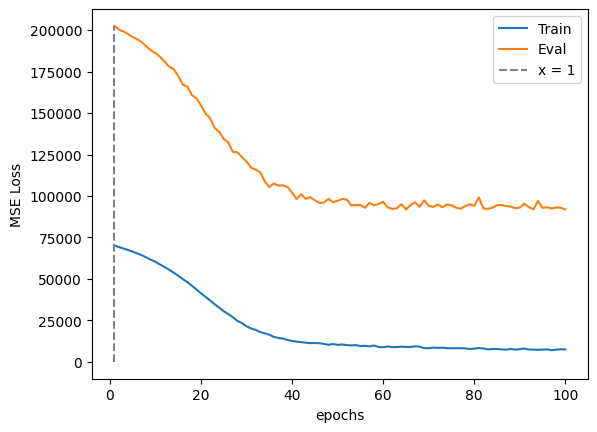

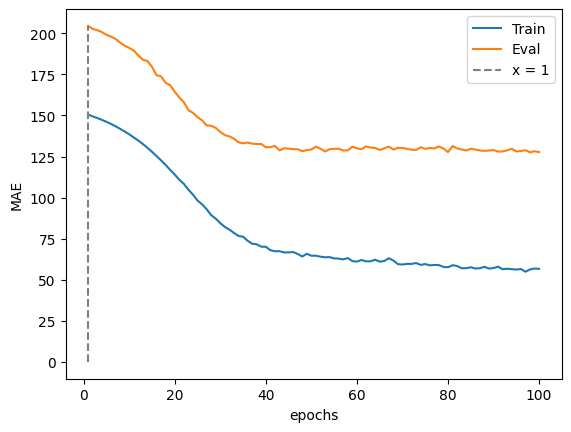

Epoch 001: | Train Loss: 69623.53403 | Val Loss: 205253.96172 | Train Acc: 150.876| Val Acc: 192.546
Epoch 002: | Train Loss: 68748.51858 | Val Loss: 202957.11406 | Train Acc: 149.752| Val Acc: 190.515
Epoch 003: | Train Loss: 67872.29436 | Val Loss: 201824.55781 | Train Acc: 148.774| Val Acc: 189.794
Epoch 004: | Train Loss: 66942.34106 | Val Loss: 200522.11094 | Train Acc: 147.713| Val Acc: 188.689
Epoch 005: | Train Loss: 65991.54149 | Val Loss: 199117.12969 | Train Acc: 146.548| Val Acc: 187.710
Epoch 006: | Train Loss: 64975.26424 | Val Loss: 197723.52734 | Train Acc: 145.289| Val Acc: 186.576
Epoch 007: | Train Loss: 63824.04861 | Val Loss: 195474.98750 | Train Acc: 143.875| Val Acc: 184.644
Epoch 008: | Train Loss: 62569.74887 | Val Loss: 194039.36719 | Train Acc: 142.467| Val Acc: 183.559
Epoch 009: | Train Loss: 61322.18273 | Val Loss: 191555.24453 | Train Acc: 140.736| Val Acc: 181.262
Epoch 010: | Train Loss: 59937.58472 | Val Loss: 189536.96328 | Train Acc: 139.123| Val Acc

Epoch 083: | Train Loss: 8192.14270 | Val Loss: 105398.57734 | Train Acc: 58.891| Val Acc: 127.115
Epoch 084: | Train Loss: 8020.42019 | Val Loss: 104261.88359 | Train Acc: 57.996| Val Acc: 125.072
Epoch 085: | Train Loss: 7919.03914 | Val Loss: 104152.57734 | Train Acc: 58.675| Val Acc: 125.451
Epoch 086: | Train Loss: 8290.24983 | Val Loss: 105902.10430 | Train Acc: 59.089| Val Acc: 125.744
Epoch 087: | Train Loss: 7874.89269 | Val Loss: 106930.15625 | Train Acc: 57.793| Val Acc: 125.238
Epoch 088: | Train Loss: 8029.36539 | Val Loss: 106266.51758 | Train Acc: 58.431| Val Acc: 126.196
Epoch 089: | Train Loss: 7642.23258 | Val Loss: 107503.16016 | Train Acc: 57.329| Val Acc: 126.254
Epoch 090: | Train Loss: 7425.14065 | Val Loss: 105637.58438 | Train Acc: 56.565| Val Acc: 126.760
Epoch 091: | Train Loss: 7741.99628 | Val Loss: 105990.59766 | Train Acc: 57.777| Val Acc: 127.249
Epoch 092: | Train Loss: 7717.59610 | Val Loss: 105726.60234 | Train Acc: 56.973| Val Acc: 126.585
Epoch 093:

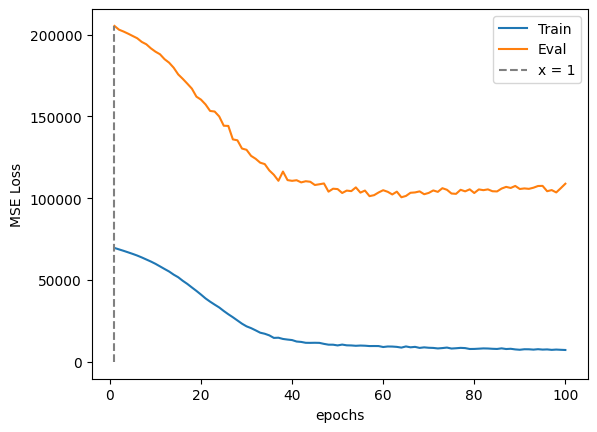

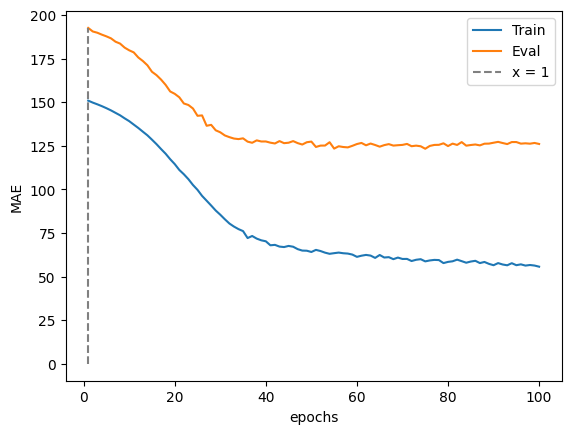

Epoch 001: | Train Loss: 72988.05425 | Val Loss: 184520.50703 | Train Acc: 153.276| Val Acc: 175.170
Epoch 002: | Train Loss: 72077.73255 | Val Loss: 182752.88906 | Train Acc: 152.120| Val Acc: 173.611
Epoch 003: | Train Loss: 71135.63099 | Val Loss: 181789.31992 | Train Acc: 151.105| Val Acc: 173.053
Epoch 004: | Train Loss: 70264.56146 | Val Loss: 180713.94570 | Train Acc: 150.077| Val Acc: 172.198
Epoch 005: | Train Loss: 69207.11363 | Val Loss: 179618.26289 | Train Acc: 148.885| Val Acc: 171.312
Epoch 006: | Train Loss: 68090.27431 | Val Loss: 178208.85938 | Train Acc: 147.607| Val Acc: 169.777
Epoch 007: | Train Loss: 66895.67630 | Val Loss: 176766.70234 | Train Acc: 146.112| Val Acc: 168.458
Epoch 008: | Train Loss: 65578.71267 | Val Loss: 175416.51250 | Train Acc: 144.593| Val Acc: 167.408
Epoch 009: | Train Loss: 64219.52266 | Val Loss: 173687.89141 | Train Acc: 142.969| Val Acc: 165.574
Epoch 010: | Train Loss: 62718.78602 | Val Loss: 171925.51016 | Train Acc: 141.146| Val Acc

Epoch 084: | Train Loss: 8520.93994 | Val Loss: 96102.25156 | Train Acc: 59.364| Val Acc: 111.797
Epoch 085: | Train Loss: 8413.97732 | Val Loss: 95947.09961 | Train Acc: 59.278| Val Acc: 111.408
Epoch 086: | Train Loss: 8453.63224 | Val Loss: 96209.60859 | Train Acc: 59.578| Val Acc: 112.507
Epoch 087: | Train Loss: 8314.25224 | Val Loss: 93681.22695 | Train Acc: 59.269| Val Acc: 112.342
Epoch 088: | Train Loss: 8231.78141 | Val Loss: 95436.26426 | Train Acc: 59.008| Val Acc: 112.755
Epoch 089: | Train Loss: 8160.70449 | Val Loss: 95872.90879 | Train Acc: 58.840| Val Acc: 113.970
Epoch 090: | Train Loss: 7990.59964 | Val Loss: 96360.51836 | Train Acc: 58.540| Val Acc: 113.708
Epoch 091: | Train Loss: 8134.53559 | Val Loss: 95973.86973 | Train Acc: 58.186| Val Acc: 112.688
Epoch 092: | Train Loss: 8799.98966 | Val Loss: 94585.02305 | Train Acc: 60.804| Val Acc: 112.417
Epoch 093: | Train Loss: 7997.76409 | Val Loss: 95453.20664 | Train Acc: 58.615| Val Acc: 112.401
Epoch 094: | Train L

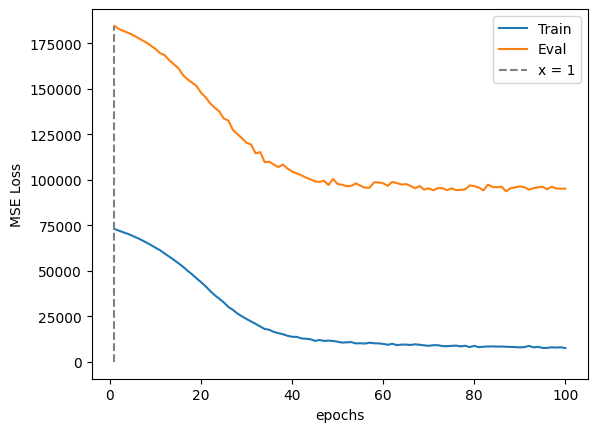

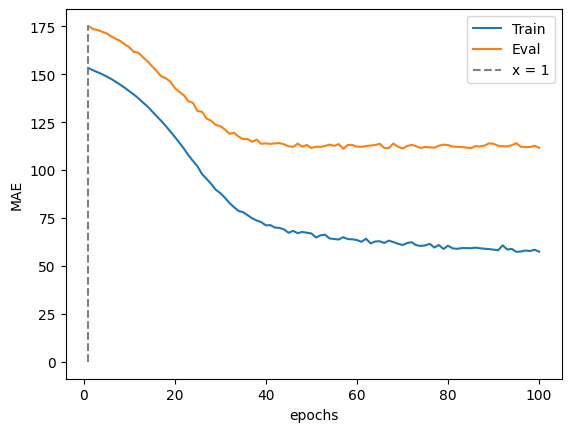

Epoch 001: | Train Loss: 68428.48359 | Val Loss: 179303.58750 | Train Acc: 149.126| Val Acc: 203.683
Epoch 002: | Train Loss: 67542.67977 | Val Loss: 177131.55313 | Train Acc: 147.967| Val Acc: 201.629
Epoch 003: | Train Loss: 66639.50043 | Val Loss: 176045.31562 | Train Acc: 146.998| Val Acc: 200.764
Epoch 004: | Train Loss: 65772.46163 | Val Loss: 174561.13437 | Train Acc: 145.957| Val Acc: 199.424
Epoch 005: | Train Loss: 64778.67457 | Val Loss: 172781.66406 | Train Acc: 144.726| Val Acc: 197.810
Epoch 006: | Train Loss: 63724.45868 | Val Loss: 170953.76875 | Train Acc: 143.471| Val Acc: 195.912
Epoch 007: | Train Loss: 62622.65677 | Val Loss: 169126.81406 | Train Acc: 141.980| Val Acc: 194.205
Epoch 008: | Train Loss: 61343.74271 | Val Loss: 167736.16250 | Train Acc: 140.440| Val Acc: 193.122
Epoch 009: | Train Loss: 60041.41194 | Val Loss: 165762.86563 | Train Acc: 138.870| Val Acc: 191.513
Epoch 010: | Train Loss: 58670.10265 | Val Loss: 164253.74063 | Train Acc: 137.221| Val Acc

Epoch 084: | Train Loss: 7930.74398 | Val Loss: 82569.49297 | Train Acc: 58.224| Val Acc: 125.990
Epoch 085: | Train Loss: 8013.20190 | Val Loss: 82431.17188 | Train Acc: 58.270| Val Acc: 123.873
Epoch 086: | Train Loss: 8265.38218 | Val Loss: 82427.60703 | Train Acc: 59.209| Val Acc: 125.128
Epoch 087: | Train Loss: 8012.49310 | Val Loss: 84667.62109 | Train Acc: 57.908| Val Acc: 125.722
Epoch 088: | Train Loss: 8013.18401 | Val Loss: 82701.21250 | Train Acc: 58.031| Val Acc: 125.222
Epoch 089: | Train Loss: 8182.50783 | Val Loss: 82284.32266 | Train Acc: 58.777| Val Acc: 125.954
Epoch 090: | Train Loss: 7569.73550 | Val Loss: 83021.32812 | Train Acc: 56.651| Val Acc: 126.193
Epoch 091: | Train Loss: 7841.91265 | Val Loss: 82888.85703 | Train Acc: 57.308| Val Acc: 126.138
Epoch 092: | Train Loss: 7375.15659 | Val Loss: 81265.48594 | Train Acc: 56.192| Val Acc: 126.013
Epoch 093: | Train Loss: 7903.66787 | Val Loss: 82991.80000 | Train Acc: 57.868| Val Acc: 125.619
Epoch 094: | Train L

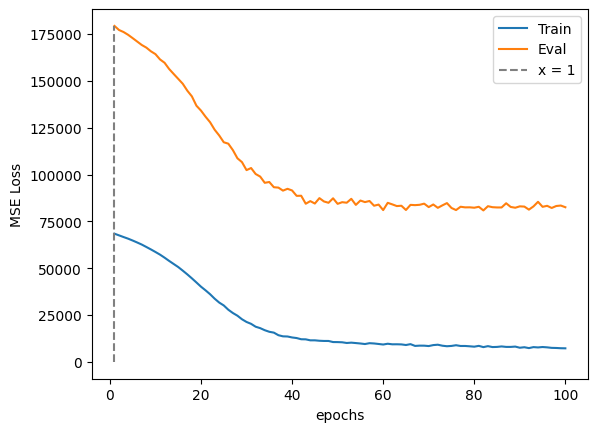

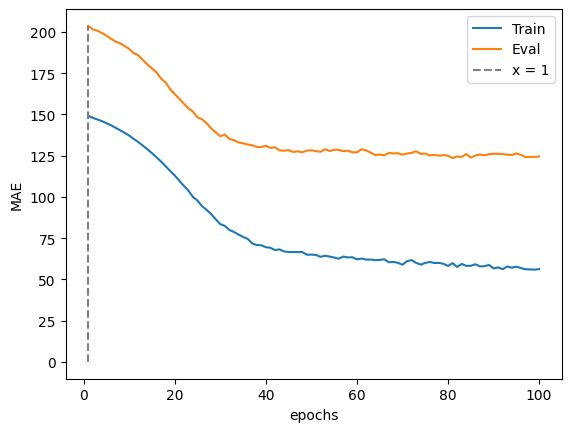

Epoch 001: | Train Loss: 72752.57865 | Val Loss: 146695.63437 | Train Acc: 152.273| Val Acc: 176.143
Epoch 002: | Train Loss: 71842.98898 | Val Loss: 145107.27969 | Train Acc: 151.121| Val Acc: 174.513
Epoch 003: | Train Loss: 70947.29948 | Val Loss: 144045.73828 | Train Acc: 150.173| Val Acc: 173.704
Epoch 004: | Train Loss: 70008.62717 | Val Loss: 143076.11484 | Train Acc: 149.126| Val Acc: 172.715
Epoch 005: | Train Loss: 69024.33012 | Val Loss: 141657.11328 | Train Acc: 147.960| Val Acc: 171.357
Epoch 006: | Train Loss: 67991.01701 | Val Loss: 140871.65547 | Train Acc: 146.688| Val Acc: 170.611
Epoch 007: | Train Loss: 66814.51328 | Val Loss: 139625.48125 | Train Acc: 145.364| Val Acc: 169.289
Epoch 008: | Train Loss: 65550.05590 | Val Loss: 137831.56016 | Train Acc: 143.771| Val Acc: 167.516
Epoch 009: | Train Loss: 64171.85087 | Val Loss: 136351.47656 | Train Acc: 142.178| Val Acc: 166.195
Epoch 010: | Train Loss: 62775.70174 | Val Loss: 134768.26719 | Train Acc: 140.507| Val Acc

Epoch 084: | Train Loss: 9131.85706 | Val Loss: 71846.46094 | Train Acc: 61.452| Val Acc: 110.216
Epoch 085: | Train Loss: 8718.14231 | Val Loss: 73026.78945 | Train Acc: 60.037| Val Acc: 109.679
Epoch 086: | Train Loss: 8508.29661 | Val Loss: 74307.18789 | Train Acc: 59.806| Val Acc: 110.189
Epoch 087: | Train Loss: 8956.28105 | Val Loss: 72967.03477 | Train Acc: 60.288| Val Acc: 109.795
Epoch 088: | Train Loss: 8318.19597 | Val Loss: 72676.86992 | Train Acc: 58.981| Val Acc: 109.258
Epoch 089: | Train Loss: 8808.33405 | Val Loss: 72466.32539 | Train Acc: 60.907| Val Acc: 109.695
Epoch 090: | Train Loss: 8551.59813 | Val Loss: 73092.00313 | Train Acc: 59.560| Val Acc: 109.602
Epoch 091: | Train Loss: 8336.38943 | Val Loss: 73029.07383 | Train Acc: 59.305| Val Acc: 111.066
Epoch 092: | Train Loss: 8588.30532 | Val Loss: 72405.40781 | Train Acc: 59.383| Val Acc: 108.953
Epoch 093: | Train Loss: 8214.78007 | Val Loss: 72620.96289 | Train Acc: 58.322| Val Acc: 110.052
Epoch 094: | Train L

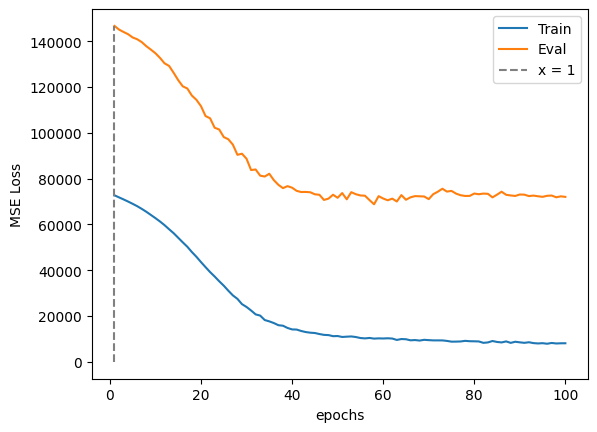

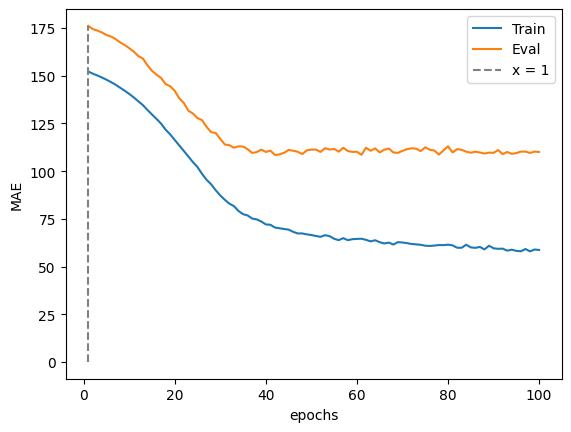

MAE on train set:  42.24283933055863
min prediction: 2
max prediction: 950

MAE on test set:  116.20941994626205
Error <= 30: 46.12 %
min prediction: 2
max prediction: 879


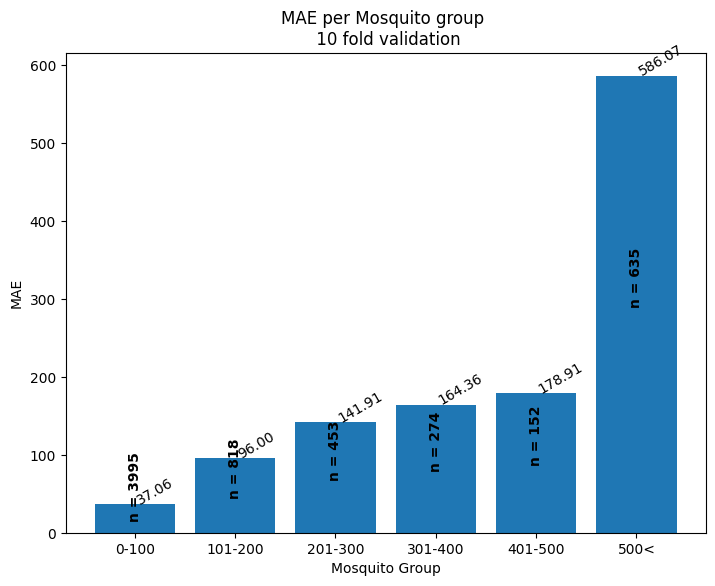

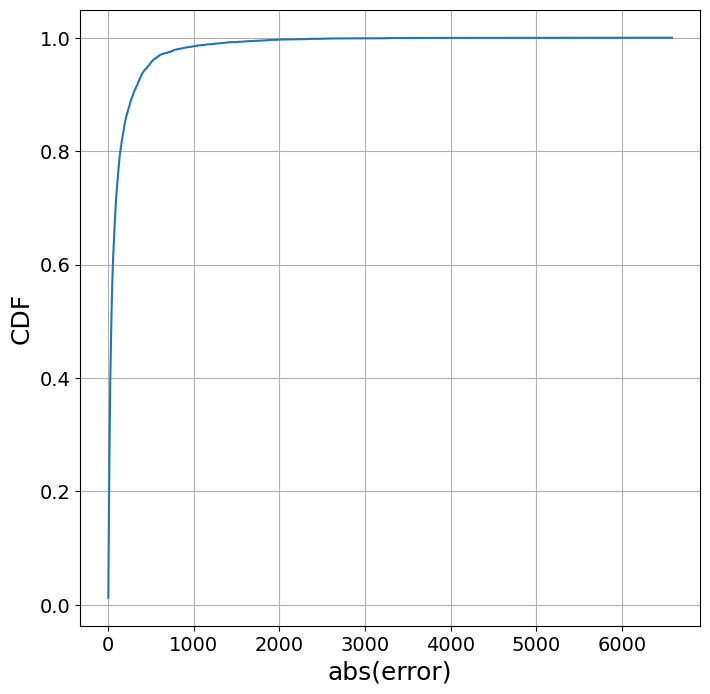

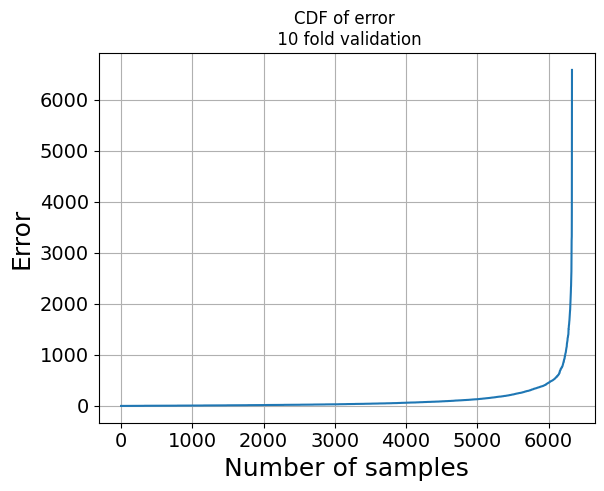

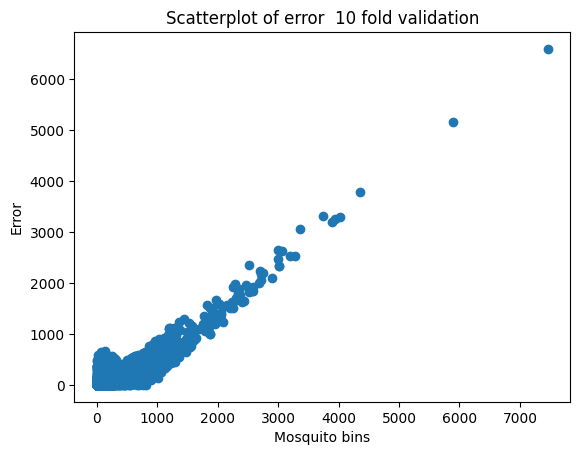

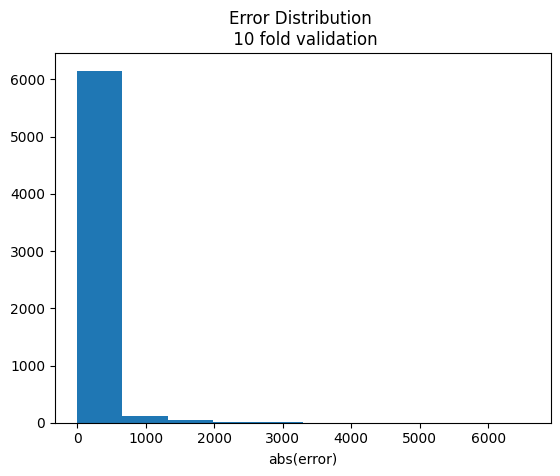

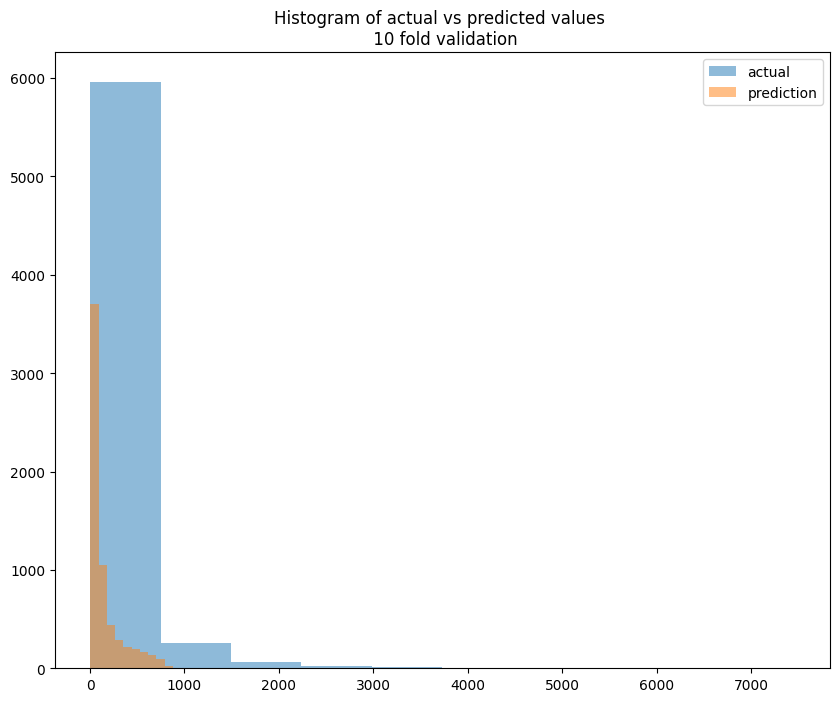

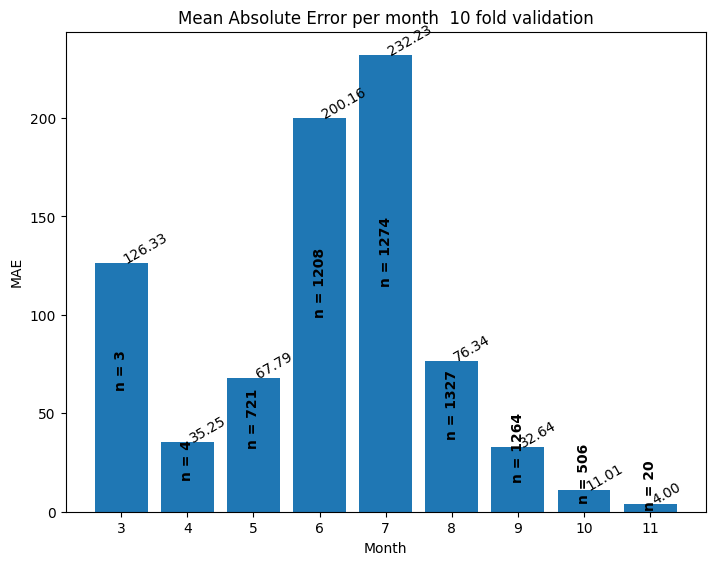

In [9]:
train_model_KFold(data, model, date_col='dt_placement', case='')

Epoch 001: | Train Loss: 82198.03604 | Val Loss: 24211.08154 | Train Acc: 163.890| Val Acc: 70.792
Epoch 002: | Train Loss: 81239.00559 | Val Loss: 24227.04248 | Train Acc: 162.784| Val Acc: 70.820
Epoch 003: | Train Loss: 80292.96112 | Val Loss: 24227.04248 | Train Acc: 161.790| Val Acc: 70.820
Epoch 004: | Train Loss: 79301.34579 | Val Loss: 24227.04248 | Train Acc: 160.772| Val Acc: 70.820
Epoch 005: | Train Loss: 78232.44229 | Val Loss: 24227.04248 | Train Acc: 159.608| Val Acc: 70.820
Epoch 006: | Train Loss: 77094.92623 | Val Loss: 24227.04248 | Train Acc: 158.295| Val Acc: 70.820
Epoch 007: | Train Loss: 75920.42001 | Val Loss: 24227.04248 | Train Acc: 156.917| Val Acc: 70.820
Epoch 008: | Train Loss: 74607.34180 | Val Loss: 24227.04248 | Train Acc: 155.425| Val Acc: 70.820
Epoch 009: | Train Loss: 73093.02947 | Val Loss: 24227.04248 | Train Acc: 153.913| Val Acc: 70.820
Epoch 010: | Train Loss: 71723.21644 | Val Loss: 24227.04248 | Train Acc: 152.102| Val Acc: 70.820
Epoch 011:

Epoch 085: | Train Loss: 9128.64189 | Val Loss: 20377.88953 | Train Acc: 62.572| Val Acc: 68.163
Epoch 086: | Train Loss: 9355.95388 | Val Loss: 20058.54663 | Train Acc: 63.267| Val Acc: 70.075
Epoch 087: | Train Loss: 8952.70716 | Val Loss: 20053.20361 | Train Acc: 62.382| Val Acc: 71.322
Epoch 088: | Train Loss: 8809.09652 | Val Loss: 20409.36365 | Train Acc: 61.434| Val Acc: 67.684
Epoch 089: | Train Loss: 8877.31163 | Val Loss: 20035.22388 | Train Acc: 61.659| Val Acc: 70.894
Epoch 090: | Train Loss: 8583.93002 | Val Loss: 20295.68457 | Train Acc: 60.626| Val Acc: 68.614
Epoch 091: | Train Loss: 8748.74022 | Val Loss: 20409.33691 | Train Acc: 60.682| Val Acc: 67.500
Epoch 092: | Train Loss: 8792.21633 | Val Loss: 20508.60254 | Train Acc: 61.873| Val Acc: 66.386
Epoch 093: | Train Loss: 8612.29056 | Val Loss: 20193.35730 | Train Acc: 60.765| Val Acc: 67.598
Epoch 094: | Train Loss: 8772.89969 | Val Loss: 20943.19507 | Train Acc: 61.415| Val Acc: 64.401
Epoch 095: | Train Loss: 8700.

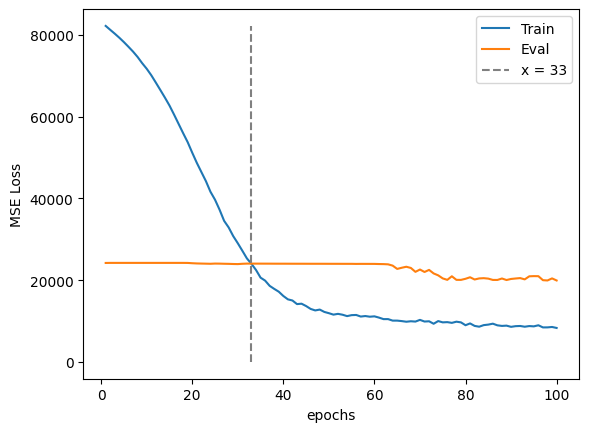

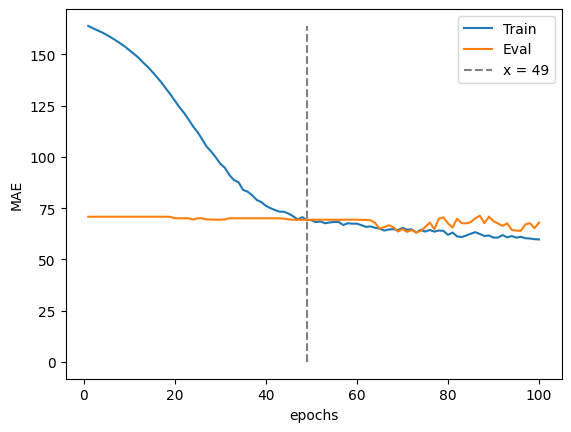

Epoch 001: | Train Loss: 13244.90096 | Val Loss: 66287.20898 | Train Acc: 71.942| Val Acc: 134.252
Epoch 002: | Train Loss: 11556.01844 | Val Loss: 61392.32812 | Train Acc: 68.732| Val Acc: 131.869
Epoch 003: | Train Loss: 11226.31655 | Val Loss: 58530.38672 | Train Acc: 67.035| Val Acc: 136.766
Epoch 004: | Train Loss: 11108.23052 | Val Loss: 58429.18359 | Train Acc: 67.212| Val Acc: 146.235
Epoch 005: | Train Loss: 10975.80736 | Val Loss: 57275.87500 | Train Acc: 67.183| Val Acc: 149.795
Epoch 006: | Train Loss: 11008.73876 | Val Loss: 56332.28906 | Train Acc: 66.642| Val Acc: 143.534
Epoch 007: | Train Loss: 10546.83268 | Val Loss: 55952.91797 | Train Acc: 65.243| Val Acc: 154.562
Epoch 008: | Train Loss: 10366.95583 | Val Loss: 55850.57812 | Train Acc: 65.339| Val Acc: 139.628
Epoch 009: | Train Loss: 10514.31010 | Val Loss: 59064.99414 | Train Acc: 65.215| Val Acc: 165.499
Epoch 010: | Train Loss: 9983.73686 | Val Loss: 56096.09570 | Train Acc: 63.612| Val Acc: 149.310
Epoch 011: 

Epoch 085: | Train Loss: 7005.62755 | Val Loss: 60619.41211 | Train Acc: 54.837| Val Acc: 164.193
Epoch 086: | Train Loss: 7039.53920 | Val Loss: 60600.05859 | Train Acc: 54.484| Val Acc: 164.709
Epoch 087: | Train Loss: 6851.11782 | Val Loss: 62085.01562 | Train Acc: 54.215| Val Acc: 169.490
Epoch 088: | Train Loss: 6814.10703 | Val Loss: 59650.29297 | Train Acc: 54.333| Val Acc: 163.959
Epoch 089: | Train Loss: 6905.28223 | Val Loss: 62797.04688 | Train Acc: 54.218| Val Acc: 170.973
Epoch 090: | Train Loss: 7129.42416 | Val Loss: 54859.44141 | Train Acc: 54.776| Val Acc: 150.588
Epoch 091: | Train Loss: 7112.09166 | Val Loss: 58327.47656 | Train Acc: 54.483| Val Acc: 164.522
Epoch 092: | Train Loss: 6768.82569 | Val Loss: 58567.60547 | Train Acc: 53.847| Val Acc: 163.012
Epoch 093: | Train Loss: 6809.84235 | Val Loss: 54479.06055 | Train Acc: 54.040| Val Acc: 150.171
Epoch 094: | Train Loss: 6812.81100 | Val Loss: 54540.94141 | Train Acc: 53.622| Val Acc: 154.659
Epoch 095: | Train L

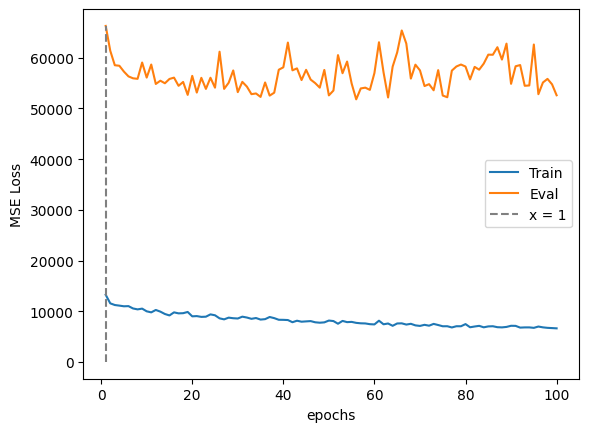

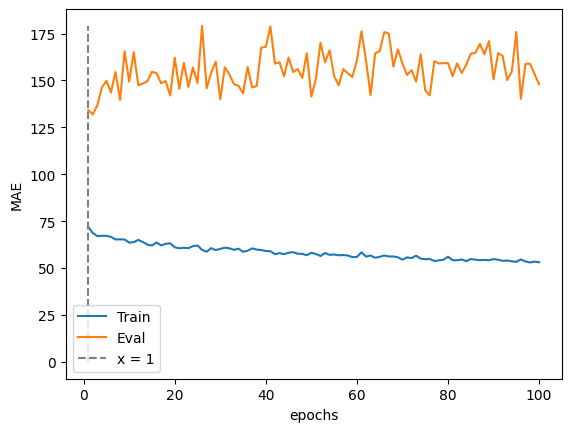

Epoch 001: | Train Loss: 10539.32443 | Val Loss: 21395.83203 | Train Acc: 63.874| Val Acc: 109.997
Epoch 002: | Train Loss: 9337.12515 | Val Loss: 20758.14990 | Train Acc: 61.274| Val Acc: 110.775
Epoch 003: | Train Loss: 9247.85011 | Val Loss: 17192.57568 | Train Acc: 60.450| Val Acc: 97.866
Epoch 004: | Train Loss: 8536.38099 | Val Loss: 20143.45703 | Train Acc: 59.157| Val Acc: 111.236
Epoch 005: | Train Loss: 8747.71512 | Val Loss: 19381.47559 | Train Acc: 59.267| Val Acc: 107.757
Epoch 006: | Train Loss: 8846.88904 | Val Loss: 18125.98193 | Train Acc: 59.819| Val Acc: 100.178
Epoch 007: | Train Loss: 8352.34092 | Val Loss: 22791.02930 | Train Acc: 58.950| Val Acc: 113.234
Epoch 008: | Train Loss: 8929.81494 | Val Loss: 17293.98193 | Train Acc: 60.297| Val Acc: 99.661
Epoch 009: | Train Loss: 8408.33549 | Val Loss: 16596.69824 | Train Acc: 58.506| Val Acc: 98.767
Epoch 010: | Train Loss: 8245.06147 | Val Loss: 14214.60303 | Train Acc: 58.027| Val Acc: 93.767
Epoch 011: | Train Loss

Epoch 086: | Train Loss: 6118.38281 | Val Loss: 10763.81836 | Train Acc: 51.445| Val Acc: 76.221
Epoch 087: | Train Loss: 6309.08432 | Val Loss: 13304.60547 | Train Acc: 51.522| Val Acc: 82.768
Epoch 088: | Train Loss: 6273.04671 | Val Loss: 11748.94434 | Train Acc: 51.618| Val Acc: 76.728
Epoch 089: | Train Loss: 6237.93396 | Val Loss: 11031.76416 | Train Acc: 51.149| Val Acc: 75.254
Epoch 090: | Train Loss: 6445.86927 | Val Loss: 13838.26172 | Train Acc: 51.834| Val Acc: 84.938
Epoch 091: | Train Loss: 6210.42048 | Val Loss: 12729.64355 | Train Acc: 50.994| Val Acc: 81.539
Epoch 092: | Train Loss: 5887.62946 | Val Loss: 10885.49658 | Train Acc: 49.846| Val Acc: 71.618
Epoch 093: | Train Loss: 6224.98002 | Val Loss: 12189.13770 | Train Acc: 50.903| Val Acc: 78.134
Epoch 094: | Train Loss: 6147.22613 | Val Loss: 8581.52661 | Train Acc: 51.394| Val Acc: 65.604
Epoch 095: | Train Loss: 5937.27073 | Val Loss: 10651.62964 | Train Acc: 50.061| Val Acc: 71.461
Epoch 096: | Train Loss: 5829.4

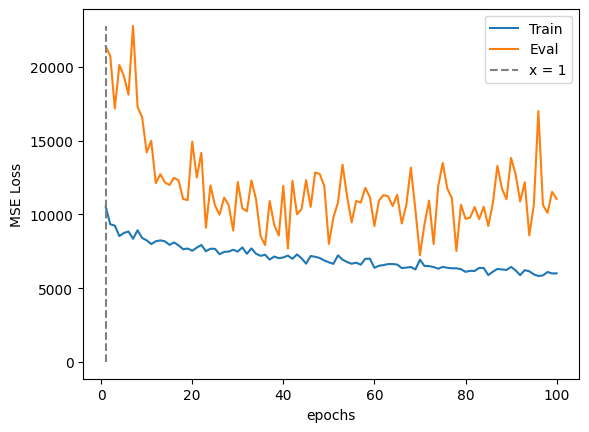

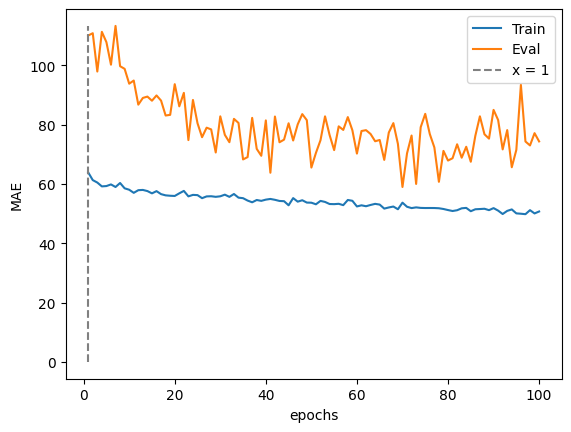

Epoch 001: | Train Loss: 8653.49712 | Val Loss: 3013.06299 | Train Acc: 57.583| Val Acc: 35.082
Epoch 002: | Train Loss: 7861.15693 | Val Loss: 3034.66882 | Train Acc: 56.582| Val Acc: 35.246
Epoch 003: | Train Loss: 7455.61441 | Val Loss: 2586.67523 | Train Acc: 55.496| Val Acc: 30.935
Epoch 004: | Train Loss: 7357.40758 | Val Loss: 2515.29468 | Train Acc: 54.918| Val Acc: 30.472
Epoch 005: | Train Loss: 7142.50862 | Val Loss: 2034.58838 | Train Acc: 54.537| Val Acc: 30.461
Epoch 006: | Train Loss: 7301.39624 | Val Loss: 2528.53516 | Train Acc: 55.072| Val Acc: 33.059
Epoch 007: | Train Loss: 7111.78010 | Val Loss: 2247.03296 | Train Acc: 54.480| Val Acc: 31.060
Epoch 008: | Train Loss: 6785.78149 | Val Loss: 2409.68683 | Train Acc: 53.276| Val Acc: 29.974
Epoch 009: | Train Loss: 7061.80126 | Val Loss: 2399.04932 | Train Acc: 54.828| Val Acc: 31.949
Epoch 010: | Train Loss: 6791.58847 | Val Loss: 2530.64514 | Train Acc: 53.876| Val Acc: 32.396
Epoch 011: | Train Loss: 6779.68408 | Va

Epoch 087: | Train Loss: 5658.44660 | Val Loss: 1983.02692 | Train Acc: 48.915| Val Acc: 25.652
Epoch 088: | Train Loss: 5243.59044 | Val Loss: 2123.92035 | Train Acc: 48.055| Val Acc: 24.733
Epoch 089: | Train Loss: 5385.33704 | Val Loss: 1814.14703 | Train Acc: 48.130| Val Acc: 25.607
Epoch 090: | Train Loss: 5151.43165 | Val Loss: 1817.77185 | Train Acc: 47.079| Val Acc: 24.905
Epoch 091: | Train Loss: 5477.97319 | Val Loss: 1905.83148 | Train Acc: 48.404| Val Acc: 25.925
Epoch 092: | Train Loss: 5395.58455 | Val Loss: 1982.80426 | Train Acc: 48.316| Val Acc: 25.328
Epoch 093: | Train Loss: 5192.60838 | Val Loss: 1816.03308 | Train Acc: 47.619| Val Acc: 24.713
Epoch 094: | Train Loss: 5273.09897 | Val Loss: 1853.52667 | Train Acc: 47.896| Val Acc: 25.763
Epoch 095: | Train Loss: 5101.38900 | Val Loss: 2026.21417 | Train Acc: 47.094| Val Acc: 24.591
Epoch 096: | Train Loss: 5115.44162 | Val Loss: 1968.29388 | Train Acc: 47.044| Val Acc: 23.980
Epoch 097: | Train Loss: 5223.55820 | Va

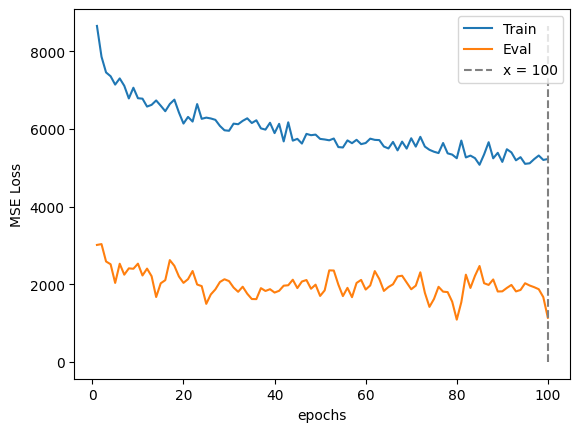

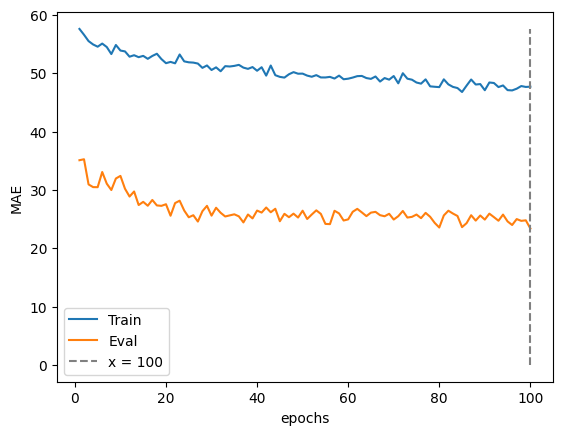

Epoch 001: | Train Loss: 7248.00022 | Val Loss: 122.72912 | Train Acc: 53.500| Val Acc: 9.776
Epoch 002: | Train Loss: 6726.72398 | Val Loss: 113.22700 | Train Acc: 52.131| Val Acc: 9.316
Epoch 003: | Train Loss: 6441.37858 | Val Loss: 114.05970 | Train Acc: 51.906| Val Acc: 9.276
Epoch 004: | Train Loss: 6555.40981 | Val Loss: 106.02967 | Train Acc: 51.928| Val Acc: 8.934
Epoch 005: | Train Loss: 6293.45421 | Val Loss: 110.09236 | Train Acc: 51.381| Val Acc: 8.987
Epoch 006: | Train Loss: 6174.41131 | Val Loss: 106.32816 | Train Acc: 50.667| Val Acc: 8.355
Epoch 007: | Train Loss: 5923.28728 | Val Loss: 105.67159 | Train Acc: 50.188| Val Acc: 8.184
Epoch 008: | Train Loss: 5781.99636 | Val Loss: 97.45374 | Train Acc: 49.936| Val Acc: 7.895
Epoch 009: | Train Loss: 5866.57500 | Val Loss: 105.77305 | Train Acc: 49.693| Val Acc: 8.566
Epoch 010: | Train Loss: 5626.85258 | Val Loss: 94.53933 | Train Acc: 48.709| Val Acc: 8.039
Epoch 011: | Train Loss: 5817.44608 | Val Loss: 95.12962 | Tra

Epoch 089: | Train Loss: 4740.85179 | Val Loss: 87.95774 | Train Acc: 45.094| Val Acc: 7.461
Epoch 090: | Train Loss: 4792.23942 | Val Loss: 86.86967 | Train Acc: 45.361| Val Acc: 7.513
Epoch 091: | Train Loss: 4699.40450 | Val Loss: 86.14828 | Train Acc: 45.121| Val Acc: 7.553
Epoch 092: | Train Loss: 4721.73350 | Val Loss: 84.54075 | Train Acc: 44.910| Val Acc: 7.118
Epoch 093: | Train Loss: 4888.33510 | Val Loss: 82.44878 | Train Acc: 45.443| Val Acc: 7.013
Epoch 094: | Train Loss: 4752.55965 | Val Loss: 85.93455 | Train Acc: 44.906| Val Acc: 7.382
Epoch 095: | Train Loss: 4484.50563 | Val Loss: 86.08968 | Train Acc: 44.479| Val Acc: 7.447
Epoch 096: | Train Loss: 4894.05886 | Val Loss: 87.09930 | Train Acc: 45.746| Val Acc: 7.079
Epoch 097: | Train Loss: 4610.57324 | Val Loss: 83.00018 | Train Acc: 45.182| Val Acc: 7.158
Epoch 098: | Train Loss: 4536.68217 | Val Loss: 82.65250 | Train Acc: 44.351| Val Acc: 7.382
Epoch 099: | Train Loss: 4745.30089 | Val Loss: 82.11361 | Train Acc: 

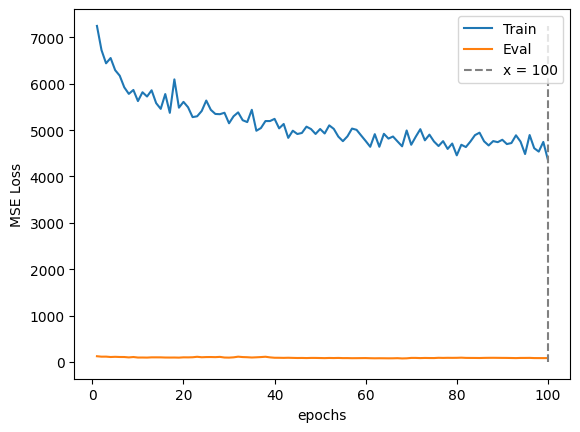

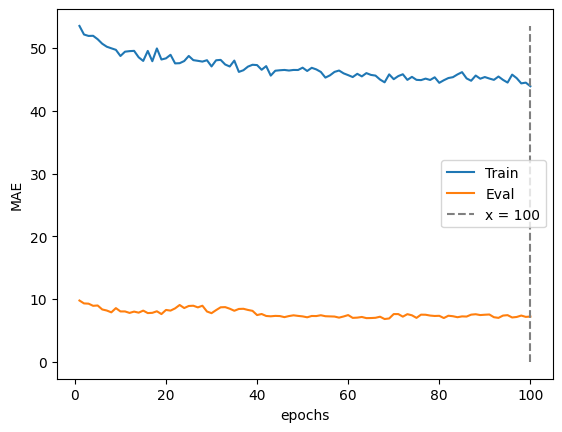

MAE on train set:  36.210908476865924
min prediction: 0
max prediction: 947

MAE on test set:  71.84247538677918
Error <= 30: 45.71 %
min prediction: 4
max prediction: 658


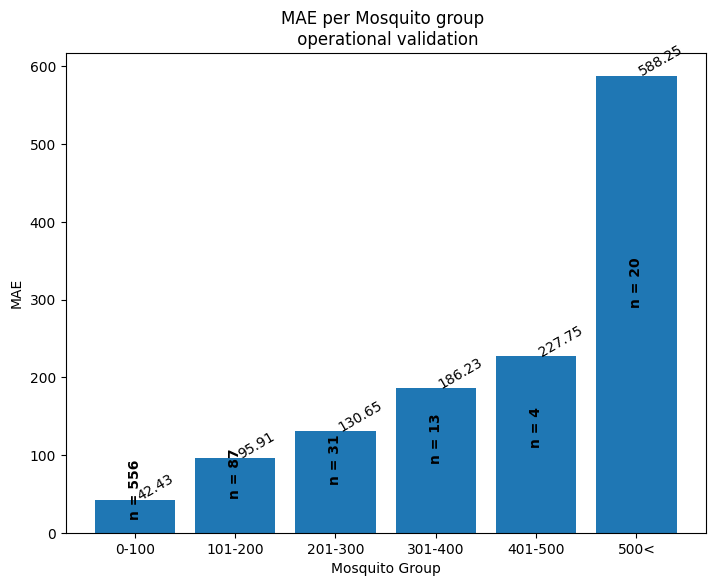

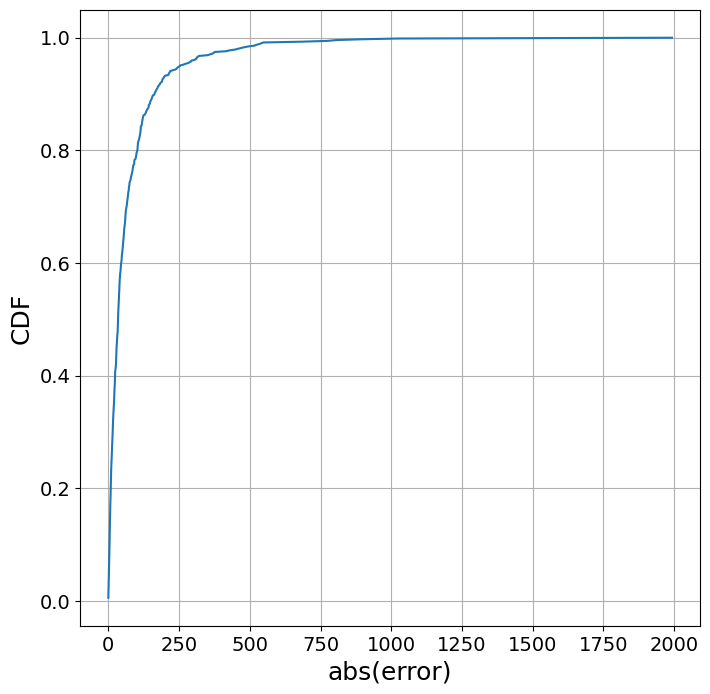

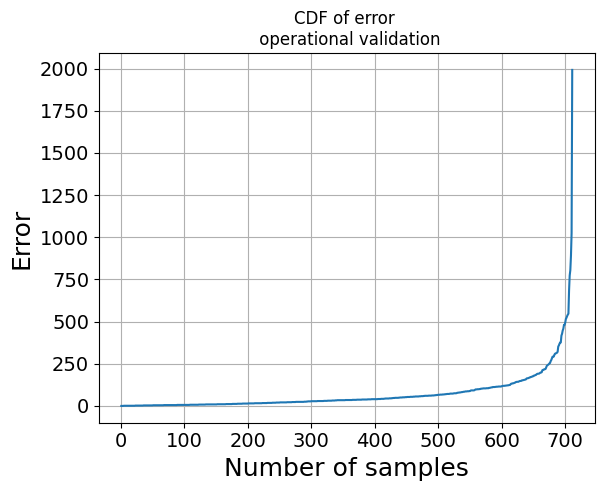

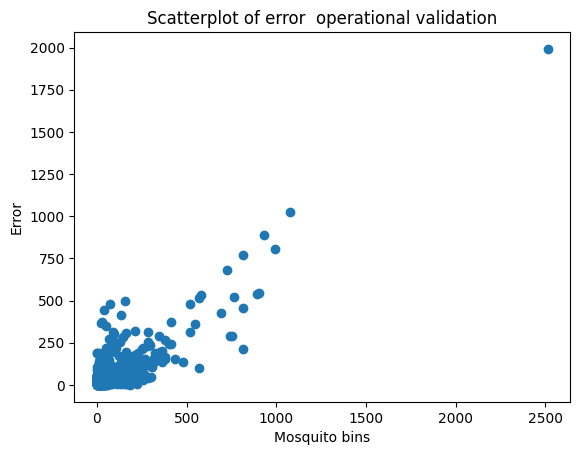

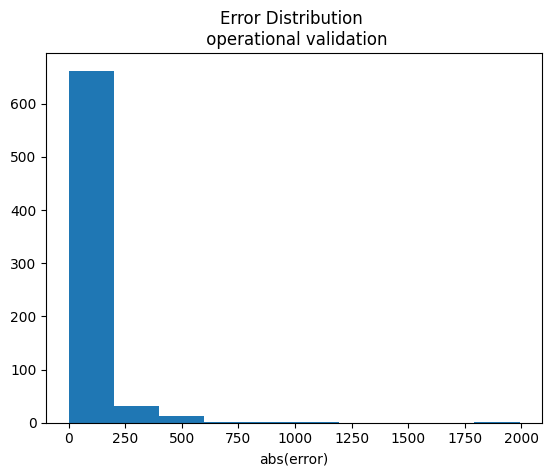

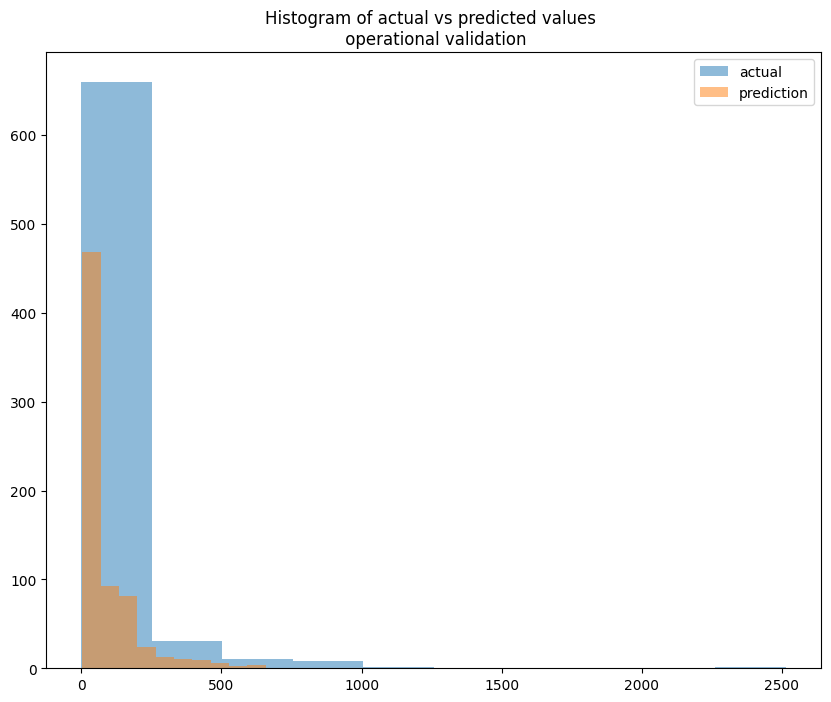

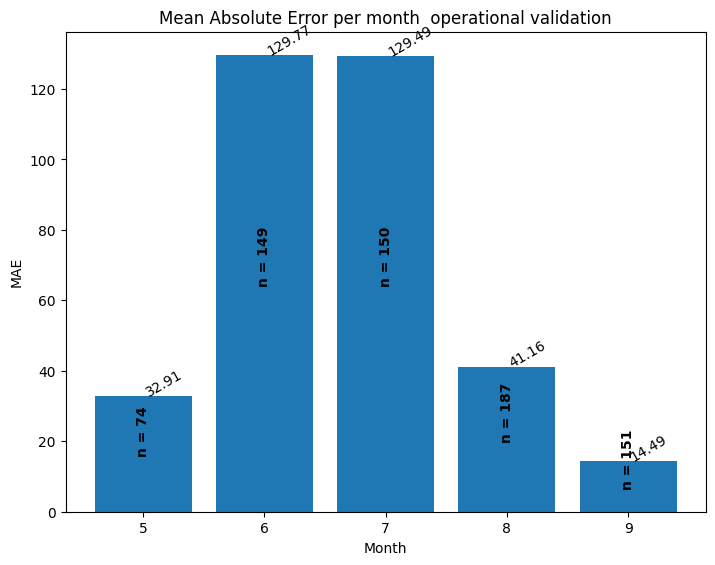

In [10]:
operational_validation(data, model, date='2022-01-01', filepath ='', date_col='dt_placement', case='', fi=False, export=False)